## Comparing Performance of Decision Trees and Random Forests Using Health Data

Simple sklearn implementation of decision trees and random forest classifiers on a country level data set that includes a number of public health features.

In [1]:
import pandas as pd
import numpy as np
import io
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%pylab inline

In [32]:
#read in data
data = pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

In [33]:
#initalize a classifier
dtc = DecisionTreeClassifier(max_leaf_nodes=3)

In [34]:
# pre-processing data
#convert target variable to numeric for input into sklearn
number_dict = {"low":1,'medium':2,'high':3,'awful':4}
data['BurdenOfDisease'].replace(number_dict,inplace=True)

#drop the country column since we don't use it
data.drop(['Country'],axis=1,inplace=True)

In [35]:
#set x and y and establish train-test-split
y = data['BurdenOfDisease']
X = data.iloc[:,:-1]

#get training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [37]:
#fit the classifier to the test data and report accuracy of the predictions
dtc.fit(X_train,y_train)
y_preds = dtc.predict(X_test)
print("In-sample accuracy score: {}".format(dtc.score(X_train,y_train)))
print("Out of sample accuracy score: {}".format(accuracy_score(y_test,y_preds)))

In-sample accuracy score: 0.6263736263736264
Out of sample accuracy score: 0.358974358974359


b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

In [38]:
#initialize iterators
max_leaf_nodes = [x for x in range(2,100)]
scores = []

#loop through the depth parameter range and append accuracy scores to scores list
for i in max_leaf_nodes:
    dtc.set_params(max_leaf_nodes=i)
    dtc.fit(X_train,y_train)
    scores.append(accuracy_score(y_test,dtc.predict(X_test)))

In [39]:
d = {'max_leaf_nodes':max_leaf_nodes,'accuracy_score':scores}
hyper = pd.DataFrame(d)

(0.3, 0.8)

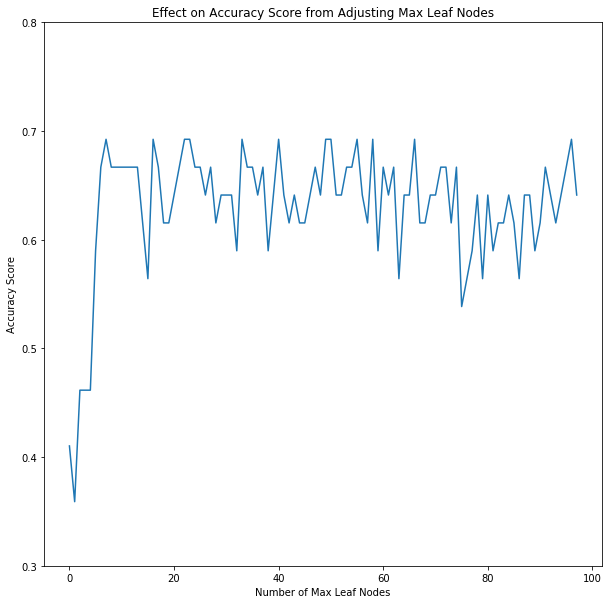

In [40]:
#plot the results of the 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.plot(hyper['accuracy_score'])

ax.set_xlabel("Number of Max Leaf Nodes")
ax.set_ylabel("Accuracy Score")
ax.set_title("Effect on Accuracy Score from Adjusting Max Leaf Nodes")
ax.set_ylim(0.3,0.8)

### Some basic parameter tuning

In [55]:
#run a grid search CV to get an ideal number of max_leaf_nodes
from sklearn.model_selection import GridSearchCV

#initialize a list of values to iterate over for max leaf and an empty list for scores and params

num_leafs = [x for x in range(2,100)]
param_grid = [{'max_leaf_nodes':num_leafs}]
cv_scores = []
param_values = []

for i in range(10):
    dt = DecisionTreeClassifier()
    gs = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy', cv=10)
    gs_d =gs.fit(X_train,y_train)
    print(gs_d.best_params_)
    param_values.append(gs_d.best_params_['max_leaf_nodes'])
    cv_scores.append(accuracy_score(y_test,gs_d.predict(X_test)))

print("Mean of out of sample accuracy score: {}".format(np.mean(cv_scores)))
print("Mean of GridSearch max_leaf_node best param: {}".format(np.mean(param_values)))

{'max_leaf_nodes': 46}
{'max_leaf_nodes': 30}
{'max_leaf_nodes': 94}
{'max_leaf_nodes': 21}
{'max_leaf_nodes': 20}
{'max_leaf_nodes': 98}
{'max_leaf_nodes': 74}
{'max_leaf_nodes': 43}
{'max_leaf_nodes': 27}
{'max_leaf_nodes': 47}
Mean of out of sample accuracy score: 0.6307692307692309
Mean of GridSearch max_leaf_node best param: 50.0


In [56]:
#set initial model to the average max_leaf_nodes from the grid search
dtc.set_params(max_leaf_nodes=50)

#fit the classifier to the test data and report accuracy of the predictions
dtc.fit(X_train,y_train)
y_preds = dtc.predict(X_test)
print("In sample Accuracy Score: {}".format(dtc.score(X_train,y_train)))
print("Out of Sample Accuracy Score: {}".format(accuracy_score(y_test,y_preds)))

In sample Accuracy Score: 1.0
Out of Sample Accuracy Score: 0.5897435897435898


### Random Forest Approach

In [69]:
#initialize the random forest 
rfc = RandomForestClassifier(n_estimators=30)

In [71]:
#fit model and report accuracy
rfc.fit(X_train,y_train)

print("In-sample accuracy score: {}".format(rfc.score(X_train,y_train)))
print("Out of Sample accuracy score: {}".format(accuracy_score(y_test,rfc.predict(X_test))))

In-sample accuracy score: 1.0
Out of Sample accuracy score: 0.5384615384615384


In [72]:
#initialize a list of values to iterate over

num_estimators = [x for x in range(2,200,5)]
param_grid = [{'n_estimators':num_estimators}]
cv_scores = []
param_values = []

for i in range(10):
    dt = RandomForestClassifier()
    gs = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy', cv=10)
    gs_d =gs.fit(X_train,y_train)
    print(gs_d.best_params_)
    param_values.append(gs_d.best_params_['n_estimators'])
    cv_scores.append(accuracy_score(y_test,gs_d.predict(X_test)))

print("Mean of out of sample accuracy score: {}".format(np.mean(cv_scores)))
print("Mean of GridSearch number of estimators best param: {}".format(np.mean(param_values)))

{'n_estimators': 127}
{'n_estimators': 47}
{'n_estimators': 47}
{'n_estimators': 47}
{'n_estimators': 17}
{'n_estimators': 22}
{'n_estimators': 62}
{'n_estimators': 22}
{'n_estimators': 17}
{'n_estimators': 47}
Mean of out of sample accuracy score: 0.5615384615384615
Mean of GridSearch number of estimators best param: 45.5


In [78]:
#take the best parameters from the grid search and set up a new model and report the out of sample accuracy
#setting estimators to 45, which was average result from the grid search

rfc.set_params(n_estimators=45)

#fit the classifier to the test data and report accuracy of the predictions
rfc.fit(X_train,y_train)
y_preds = rfc.predict(X_test)
print("the accuracy score of the model on the test set is: {}".format(rfc.score(X_test,y_test)))

the accuracy score of the model on the test set is: 0.5128205128205128


The accuracy of the decision tree and random forest models are similar for this problem. After gridsearchCV and hyperparameter tuning the decision tree model performs better, with an out of sample accuracy of ~0.59 whereas the random forest only achieved an accuracy score of 0.51. In general, we would expect an ensemble learning method such as the Random Forest to outperform the decision tree model, but there could be a number of reasons why this isn't the case for this specific problem:

- Number of Features: There are only 14 features in our model which isn't a large number to sub-divide on, which may limit the benefit of using an ensemble method.
- Total Sample Size: Since there are only 130 countries in our data set to classify, there may not be significnat benefits from bootstrapping (which occurs with the random forest model)
- Estimator Correlation: If there is correlation between our estimators, e.g. our trees, there may not be significant benefits from using an ensemble method. The reduction in mean squared error is muted because 

In terms of interpretability, the random forest model is an ensemble learning method, which is inevitably more difficult to interpret than the decision tree model, which can be broken down into a set of human interpretable rules. Given that we get a similar accuracy from the decision tree model but there is higher interpretability, it is likely a better choice for this problem.